# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
#Import dataSet
df = pd.read_csv('/workspaces/K_means_ns_RDH/data/raw/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Partición de datos para X_variables

In [3]:
#Selección de variables de interés
X = df[['MedInc', 'Longitude', 'Latitude']]
X

,MedInc,Longitude,Latitude
0,8.3252,-122.23,37.88
1,8.3014,-122.22,37.86
2,7.2574,-122.24,37.85
3,5.6431,-122.25,37.85
4,3.8462,-122.25,37.85
...,...,...,...
20635,1.5603,-121.09,39.48
20636,2.5568,-121.21,39.49
20637,1.7000,-121.22,39.43
20638,1.8672,-121.32,39.43


In [4]:
#Partición de datos sobre las variables que nos interesan del estudio.
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [5]:
#Escalado de variables 

# Escalar datos
scaler_1 = StandardScaler()

X_train_sc = scaler_1.fit_transform(X_train)
X_test_sc = scaler_1.transform(X_test)

In [6]:
#Entrenar el K-means en 6 clusters
kmeans_model = KMeans(n_clusters = 6, random_state = 42)
kmeans_model.fit(X_train_sc)

clusters_train = kmeans_model.labels_ #etiquetas obtenidas durante el entrenamiento

#Predecir clusters para el X_test
clusters_test = kmeans_model.predict(X_test_sc)

In [7]:
#Etiquetas numéricas para los grupos asignados en el modelo de entrenamiento sobre X-train
clusters_train

array([3, 3, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [8]:
#Etiquetas numéricas para los grupos asignados en el modelo de entrenamiento sobre X-test
clusters_test

array([3, 3, 5, ..., 2, 5, 3], shape=(4128,), dtype=int32)

#### Añadir columna con las categorías obtenidas en X-train y X-test

In [9]:
#Crear columna vacía para clusters en df original (X_train y X_test) fila por fila en ambos X posterior a la partición
df['cluster'] = -1  # valor momentáneo para reasignar en el llenado (marcador temporal) - Esto fue previamente investigado

#Asignar clusters usando los índices originales
df.loc[X_train.index, 'cluster'] = clusters_train
df.loc[X_test.index, 'cluster'] = clusters_test

# Convertir a categoría
df['cluster'] = df['cluster'].astype('category') #Podría haber sido int64. 

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MedInc       20640 non-null  float64 
 1   HouseAge     20640 non-null  float64 
 2   AveRooms     20640 non-null  float64 
 3   AveBedrms    20640 non-null  float64 
 4   Population   20640 non-null  float64 
 5   AveOccup     20640 non-null  float64 
 6   Latitude     20640 non-null  float64 
 7   Longitude    20640 non-null  float64 
 8   MedHouseVal  20640 non-null  float64 
 9   cluster      20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


### Visualización de la distribución de valores de acuerdo al K-mean estimado

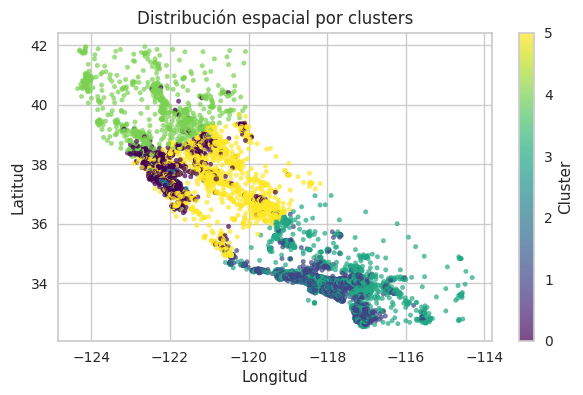

In [12]:
#Distribución espacial de valores por los k-mean del cluster:
plt.figure(figsize=(7, 4)) # Dimensiones del gráfico

scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'].cat.codes, cmap='viridis', s=10, alpha=0.7) #Sabiendo que cluster es del tipo categórico
plt.title('Distribución espacial por clusters')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(scatter, label='Cluster')
plt.show()

### **Observaciones**

El gráfico nos muestra con un k-means de 6 (grupos), una distribución de casas sectorizada pero no tan claramente divididas. Es evidente que muchas de ellas comparten localización y que por localización geográfica, también el ingreso medio esté sujeto a una distribución similar. En pocas palabras, si existe segregación, pero creo que es posible mejorarla.

#### Probaremos cuál es el número k óptimo para obtener mejores divisiones de los grupos en estudio

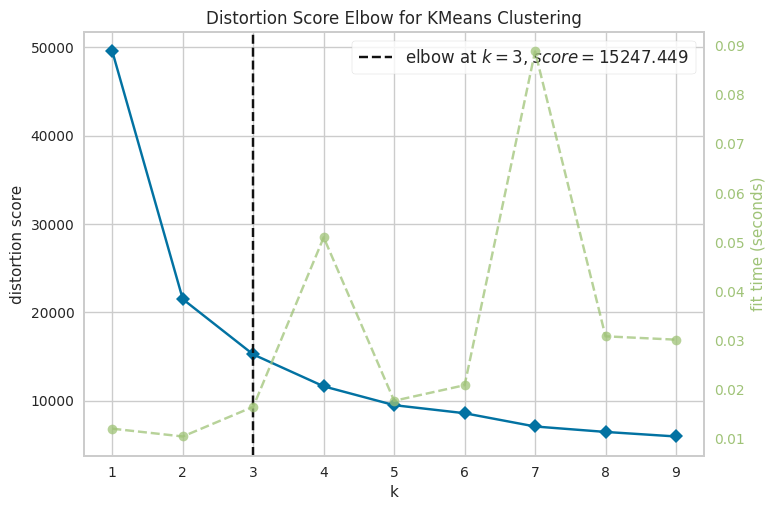

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#Probamos a través del método del codo sobre los datos de entrenamiento:
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))
elbow_vis.fit(X_train_sc)
elbow_vis.show()

### **Observaciones**
Si empleamos como valores ejemplos de prueba de 1 a 10, resulta un k=3 el óptimo para la división. En contraparte, si probamos de 1-20, la sugerencia cambia a un k entre 2.5 y 5, un número completamente diferente en dimensión. Intentaremos confirmar con otro método como Silhouette.

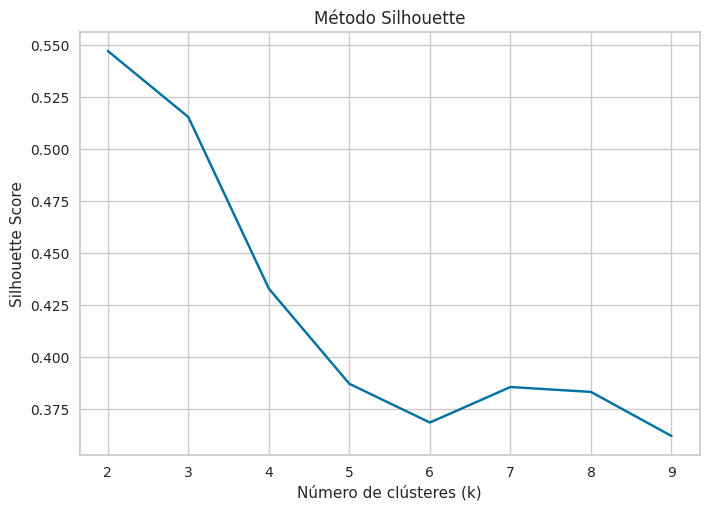

In [14]:
# Probamos a través del método del codo sobre los datos de entrenamiento:
# Definir el rango de número de clústeres para probar
k_values = range(2, 10)

# Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

# Probar diferentes valores de k
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train_sc)
  silhouette_scores.append(silhouette_score(X_train_sc, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

## **Observaciones**
De acuerdo a lo obtenido en Silhouette, sugiere un k-óptimo de 2, coincidiendo en cierta medida con lo predicho en el método anterior. No obstante, continuaré el estudio tal como indica el ejercicio para los modelos siguientes.

### Partición de datos para nuestro modelo Supervisado - Utilizaré modelo de k-NN

In [15]:
# Partición de datos para modelo supervisado:
X_supervised = df[['Longitude','Latitude', 'MedInc']]
y_supervised = df["cluster"].cat.codes

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_supervised, y_supervised, test_size = 0.2, random_state = 42)

In [16]:
#Escalado de los datos (k-NN es susceptible a la escala de las variables):

scaler_2 = StandardScaler()   
X_train_scaled = scaler_2.fit_transform(X_train_s)
X_test_scaled = scaler_2.transform(X_test_s)

In [17]:
# Entrenamiento del modelo K-Vecinos:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_s)  
y_pred_s = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_s, y_pred_s))      
print("Reporte de datos:\n", classification_report(y_test_s, y_pred_s))

Accuracy: 0.9895833333333334
Reporte de datos:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       557
           1       0.99      0.99      0.99       897
           2       1.00      0.98      0.99       116
           3       0.99      0.99      0.99      1397
           4       0.98      0.97      0.98       246
           5       0.98      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



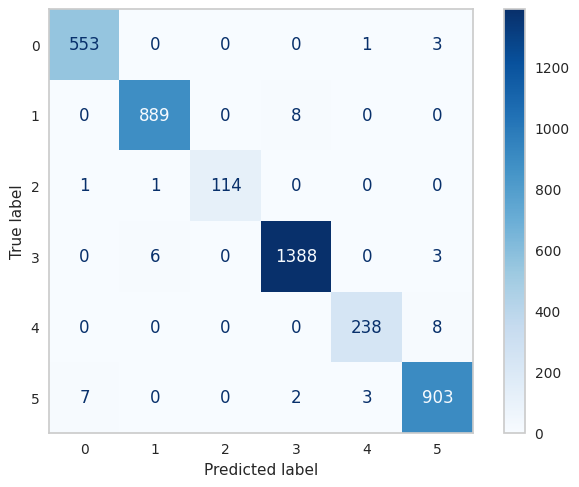

In [18]:
#Matriz de confusión 
cm = confusion_matrix(y_test_s, y_pred_s)

# Crear display de matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Gráfico de la matriz
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## **Observaciones**

Es de esperar que luego de un modelo de agrupación en el que tenemos un vistazo 'a priori' de la forma de agrupar las casas por los ingresos medios y la ubicación (por kmeans - clustering), abre un camino para un análisis mucho más preciso en un modelo supervisado con las ideas claras de segregación.

De acuerdo a las métricas obtenidas en 'accuracy', sugiere que el modelo k-NN clasifica correctamente el 99% de los casos del conjunto de prueba. Muy pocos falsos positivos detectados (precisión alta) y muy pocos falsos negativos (recall alto). 

No sé si con estas métricas sería recomendable la otimización de hiperparámetros como el valor de k-óptimo como un refuerzo de los modelos realizados y dejar como modelo definitivo el argumento de 'k = al óptimo obtenido'. 
